# Analysis

In [195]:
import numpy as np
import pvml
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import seaborn as sn

# Data

#### Train

In [2]:
train_data = np.loadtxt("train_bow.txt.gz")
X_train = train_data[:, :-1]
Y_train = train_data[:, -1]

print("Train Data Loaded")

Train Data Loaded


#### Test

In [3]:
test_data = np.loadtxt("test_bow.txt.gz")
X_test = test_data[:, :-1]
Y_test = test_data[:, -1]

print("Test Data Loaded")

Test Data Loaded


#### Scaled Data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_scaled)

X_train_scaled_scaled = scaler.transform(X_train_scaled)
X_test_scaled_scaled = scaler.transform(X_test_scaled)

# I. Logistic Regression

In [6]:
logreg = LogisticRegression(
    random_state=0,
    solver='liblinear'
).fit(X_train, Y_train)

#### Accuracies

In [9]:
logreg_train_predictions = logreg.predict(X_train)
logreg_train_accuracy = round(
    (logreg_train_predictions == Y_train).mean(),
    5
)

print(f"Logistic Regression Train Accuracy: {logreg_train_accuracy * 100}%")

Logistic Regression Train Accuracy: 92.906%


In [10]:
logreg_test_predictions = logreg.predict(X_test)
logreg_test_accuracy = round(
    (logreg_test_predictions == Y_test).mean(),
    5
)

print(f"Logistic Regression test Accuracy: {logreg_test_accuracy * 100}%")

Logistic Regression test Accuracy: 69.476%


# II. SVM

In [11]:
linear_svm = svm.LinearSVC(max_iter=10000, dual=False).fit(X_train, Y_train)

#### Accuracies

In [13]:
linear_svm_train_predictions = linear_svm.predict(X_train)
linear_svm_train_accuracy = round(
    (linear_svm_train_predictions == Y_train).mean(),
    5
)

print(f"Linear SVM Train Accuracy: {linear_svm_train_accuracy * 100}%")

Linear SVM Train Accuracy: 95.104%


In [14]:
linear_svm_test_predictions = linear_svm.predict(X_test)
linear_svm_test_accuracy = round(
    (linear_svm_test_predictions == Y_test).mean(),
    5
)

print(f"Linear SVM Test Accuracy: {linear_svm_test_accuracy * 100}%")

Linear SVM Test Accuracy: 66.167%


# III. Multiclass SVM

In [34]:
multi_svm_w, multi_svm_b = pvml.multiclass_svm.one_vs_rest_svm_train(
    X_train,
    Y_train,
    lambda_=0,
    steps=5000
)

#### Accuracies

In [44]:
multiclass_svm_train_scores = pvml.multiclass_svm.one_vs_rest_svm_inference(
    X_train,
    W=multi_svm_w,
    b=multi_svm_b
)
multiclass_svm_train_accuracy = round(
    (Y_train == multiclass_svm_train_scores[0]).mean(),
    5
)

print(f"Multiclass SVM Train accuracy : {multiclass_svm_train_accuracy * 100}%")

Multiclass SVM Train accuracy : 73.729%


In [45]:
multiclass_svm_test_scores = pvml.multiclass_svm.one_vs_rest_svm_inference(
    X_test,
    W=multi_svm_w,
    b=multi_svm_b
)
multiclass_svm_test_accuracy = round(
    (Y_test == multiclass_svm_test_scores[0]).mean(),
    5
)

print(f"Multiclass SVM Test accuracy : {multiclass_svm_test_accuracy * 100}%")

Multiclass SVM Test accuracy : 69.101%


# IV. Neural Networks

### A) Stochastic with One Hidden Layer

In [79]:
mlp_1 = MLPClassifier(
    activation="relu",
    solver='sgd',
    alpha=1e-5,
    hidden_layer_sizes=(10),
    random_state=1,
    max_iter=5000,
)

In [ ]:
mlp_1.fit(X_train, Y_train)

In [83]:
mlp_1_train_acc = round(
    (Y_train == mlp_1.predict(X_train)).mean(),
    5
)
print(f" First MLP - Train Accuracy:{mlp_1_train_acc * 100}%")

 First MLP - Train Accuracy:99.86%


In [84]:
mlp_1_test_acc = round(
    (Y_test == mlp_1.predict(X_test)).mean(),
    5
)
print(f" First MLP - Test Accuracy:{mlp_1_test_acc * 100}%")

 First MLP - Test Accuracy:67.728%


### B) Mini Batch with 2 Hidden Layers and Scaled Data

In [89]:
mlp_2 = MLPClassifier(
    activation="relu",
    solver='sgd',
    alpha=1e-5,
    hidden_layer_sizes=(100, 10),
    random_state=1,
    max_iter=2000,
    batch_size=10
)

In [94]:
mlp_2.fit(X_train_scaled, Y_train)

MLPClassifier(alpha=1e-05, batch_size=10, hidden_layer_sizes=(100, 10),
              max_iter=2000, random_state=1, solver='sgd')

In [95]:
mlp_2_train_acc = round(
    (Y_train == mlp_2.predict(X_train_scaled)).mean(),
    5
)
print(f" Second MLP - Train Accuracy:{mlp_2_train_acc * 100}%")

 Second MLP - Train Accuracy:99.89099999999999%


In [96]:
mlp_2_test_acc = round(
    (Y_test == mlp_2.predict(X_test_scaled)).mean(),
    5
)
print(f" Second MLP - Test Accuracy:{mlp_2_test_acc * 100}%")

 Second MLP - Test Accuracy:66.355%


# V. Accuracy Recap

In [118]:
train_accs = [
    logreg_train_accuracy,
    linear_svm_train_accuracy,
    multiclass_svm_train_accuracy,
    mlp_1_train_acc,
    mlp_2_train_acc
]
train_accs = [x*100 for x in train_accs]
    
test_accs = [
    logreg_test_accuracy,
    linear_svm_test_accuracy,
    multiclass_svm_test_accuracy,
    mlp_1_test_acc,
    mlp_2_test_acc
]
test_accs = [x*100 for x in test_accs]

model_names = [
    "Logistic Regression",
    "Linear SVM",
    "Multiclass SVM",
    "MLP - 1 Layer",
    "MLP - Minibatch 2 Layers"
]

index_ = ["Train Accuracies", "Test Accuracies"]

In [119]:
pd.DataFrame([train_accs, test_accs], columns=model_names).rename(index={0:'Train Accuracies', 1:'Test Accuracies'})

,Logistic Regression,Linear SVM,Multiclass SVM,MLP - 1 Layer,MLP - Minibatch 2 Layers
Train Accuracies,92.906,95.104,73.729,99.860,99.891
Test Accuracies,69.476,66.167,69.101,67.728,66.355


# VI. Confusion Matrix - Logistic Regression

In [150]:
def conf_mat(X, Y):
    labels = [int(x) for x in logreg_test_predictions]
    Y = [int(x) for x in Y]
    conf_matrix = np.zeros((8, 8))

    for i in range(X.shape[0]):
        conf_matrix[Y[i], labels[i]] += 1

    conf_matrix = conf_matrix / conf_matrix.sum(1, keepdims=True)
    
    return conf_matrix

In [185]:
classes = ["American", "Asian", "French", "Indian", "Italian", "Jewish", "Mexican", "Middle_Eastern"]
confusion_matrix = conf_mat(X_test, Y_test)

In [188]:
print("Confusion Matrix - Logistic Regression".center(90))
print()
print()

print(" " * 10, end="")

for j in range(8):
    print("%11s" % classes[j][:4], end="")
print()
print()

for i in range(8):
    print("%15s" % classes[i], end="   ")
    
    for j in range(8):
        print("%.3f" % confusion_matrix[i, j], end="      ")
    print()
    
    print()

                          Confusion Matrix - Logistic Regression                          


                 Amer       Asia       Fren       Indi       Ital       Jewi       Mexi       Midd

       American   0.537      0.053      0.147      0.023      0.137      0.040      0.053      0.010      

          Asian   0.038      0.840      0.017      0.035      0.017      0.017      0.024      0.010      

         French   0.170      0.030      0.567      0.007      0.144      0.044      0.019      0.019      

         Indian   0.080      0.080      0.068      0.625      0.011      0.023      0.023      0.091      

        Italian   0.090      0.023      0.100      0.003      0.720      0.030      0.023      0.010      

         Jewish   0.073      0.012      0.134      0.024      0.110      0.500      0.049      0.098      

        Mexican   0.068      0.037      0.042      0.010      0.031      0.005      0.791      0.016      

 Middle_Eastern   0.060      0.108      0.084      

### Heatmap 

In [192]:
def heatmapper(conf_mat, title):
    plt.figure(figsize=(10, 5))
    sn.set(font_scale=1)

    sn.heatmap(
        conf_mat,
        annot=True,
        annot_kws={"size": 15},
        xticklabels=classes,
        yticklabels=classes,
        cmap="Blues"
    )

    plt.title(title)

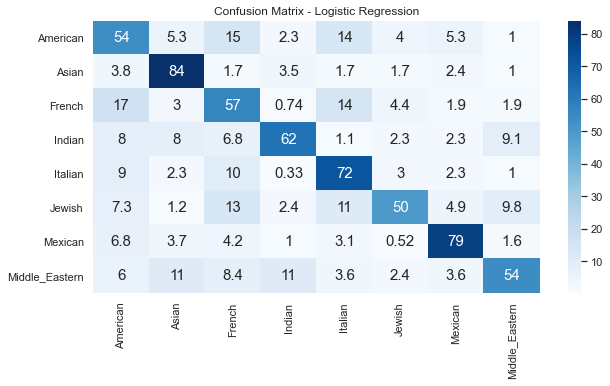

In [196]:
df_cm = pd.DataFrame(confusion_matrix*100)
heatmapper(df_cm, "Confusion Matrix - Logistic Regression")

# VII. Weight Analysis

In [220]:
f = open("vocabulary.txt", encoding="utf-8")
vocabulary = f.read().split()
f.close()

In [253]:
pd.DataFrame(
    [multi_svm_w[0], multi_svm_w[1]],
    columns=classes
).rename(index={0:vocabulary[0],1:vocabulary[1]})

,American,Asian,French,Indian,Italian,Jewish,Mexican,Middle_Eastern
cup,0.018698,-0.044975,-0.066431,-0.034448,0.006067,-0.006990,-0.002449,0.008333
tablespoon,-0.011065,0.034418,0.007987,-0.037745,-0.019882,0.006689,-0.044416,-0.004461
